In [1954]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [1955]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1956]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData
from dateutil.relativedelta import relativedelta

In [1957]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [1958]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables
metadata = MetaData()
metadata.reflect(engine)



In [1959]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [1960]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [1961]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [1962]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23',)

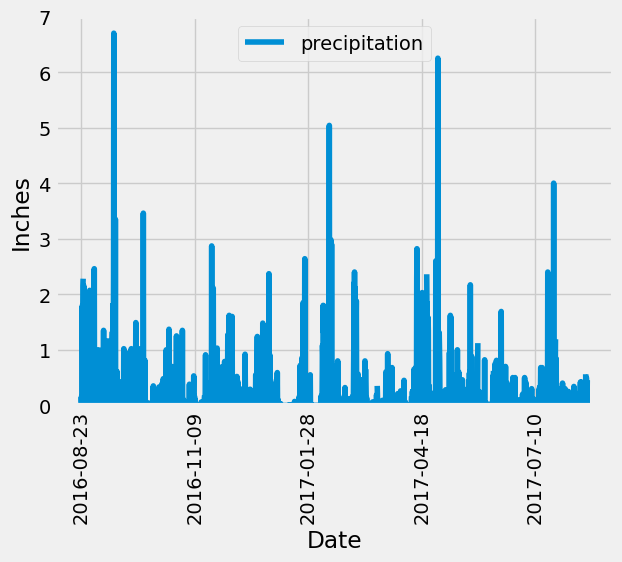

In [1963]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8 ,23) - relativedelta(years=1)


# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).order_by(Measurement.date.asc()).all()
precipitation_df = pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
precipitation_df = precipitation_df.set_index('date')
precipitation_df.rename(columns={'prcp':'precipitation'}, inplace=True)
precipitation_df.plot()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.ylim(0,7)
plt.show()


In [1964]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = precipitation_df.describe()
summary_statistics


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [1965]:
# Design a query to calculate the total number of stations in the dataset
stations_total = session.query(Station.station).count()
stations_total


9

In [1966]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station,
    func.count(Measurement.station)).order_by(func.count(Measurement.station).desc()).group_by(Measurement.station).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [1967]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_id = active_stations[0][0]
most_active_station_id

lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
print(lowest_temp)

highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
print(highest_temp)

avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station_id).all()
print(avg_temp)



[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


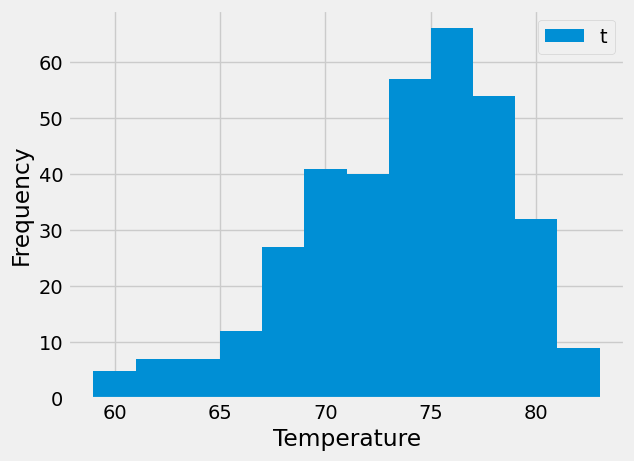

In [1968]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(Measurement.date).filter(Measurement.station == most_active_station_id).order_by(Measurement.date.desc()).first()

tobs_hist = session.query(Measurement.date, Measurement.tobs).filter(Measurement.station == most_active_station_id).filter(Measurement.date >= '2016-08-18').all()


hist_df = pd.DataFrame(tobs_hist)['tobs']

hist = hist_df.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.show()


# Close Session

In [ ]:
# Close Session
session.close()